# Introduction to KNN

#### KNN is an non parametric lazy learning algorithm.
1) When you say a technique is non parametric , it means that it does not make any assumptions on the underlying data distribution.<br><br>
2) It is also a lazy algorithm. What this means is that it does not use the training data points to do any generalization. In other words, there is **no explicit training phase or it is very minimal**. This means the training phase is pretty fast. Lack of generalization means that KNN keeps all the training data. More exactly, all the training data is needed during the testing phase.<br><br>
3) To make a prediction for new data point, the algorithm finds the closest data point in the training data set its nearest neighbors.<br><br>
4) Instead of considering only the closest neighbor, we can also consider an arbitrary number, K of neighbors. This is where the name of the K-nearest neighbors algorithm comes from.<br><br>

#### when considering more than one neighbor.
* we use voting to assign a label(i.e, the majority class amoung the K-nearest neighbours). for **KNN classifier**.
* The prediction is the average or mean, of the relevent neighbours for **KNN Regression**.

#### *Note*
1) Using few neighbours corresponds to high model complexity. and using many neighbors corresponds to low model complexity.<br><br>
2) If we consider the extreme case where the number of neighbour is the number of all data points in the training set, each test point would have exactly the same neighbors and all predictions would be the same : the class that is most frequent in the training set.<br><br>

####  parameters.
* In practice, using a small number of neighbors like three or five often work well.
* by default, Euclidean distance is used, which works well in many settings.

#### weakness
* Buliding the nearest neighbors models is usually very fast, but when your training set is very large.(either in number of samples prediction can be slow).
* when using the K-NN algorithm, its important to preprocess your data.
* This approach often does not perform well on datasets with many features, and it does particularly badly with datasets where most features are zero most of time.
* The cost is in terms of both time and memory. More time might be needed as in the worst case, all data points might take point in decision. More memory is needed as we need to store all training data.

In [69]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
cancer = load_breast_cancer()

In [23]:
X_train,X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42 )

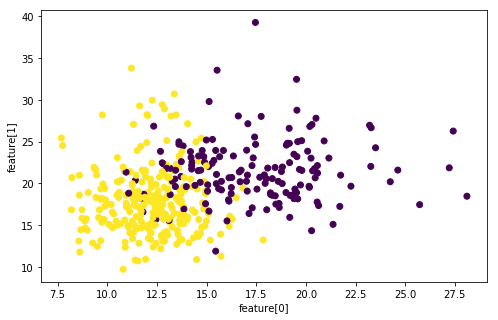

In [60]:
plt.figure(figsize=(8,5))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.xlabel('feature[0]')
x= plt.ylabel('feature[1]')

In [54]:
def plot_decision_boundary(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X1 = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X1).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred,cmap=plt.cm.brg, alpha=0.1)

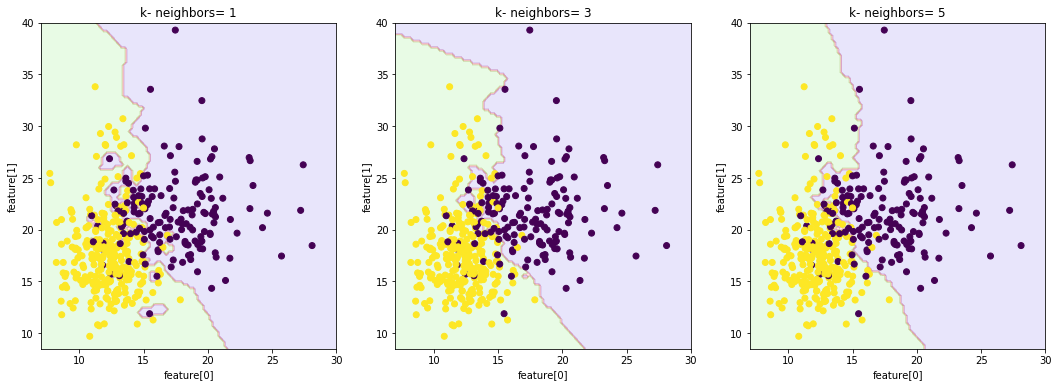

In [56]:
plt.figure(figsize=(18,6))
for k, i in zip([1, 3, 5], [1,2,3]):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train[:,:2], y_train)
    plt.subplot(1,3,i)
    plot_decision_boundary(clf, [7,30,8.5,40])
    plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
    plt.title('k- neighbors= {}'.format(k))
    plt.xlabel('feature[0]')
    plt.ylabel('feature[1]')

In [64]:
train_accuracy, test_accuracy = [],[]
for k in range(1,10):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

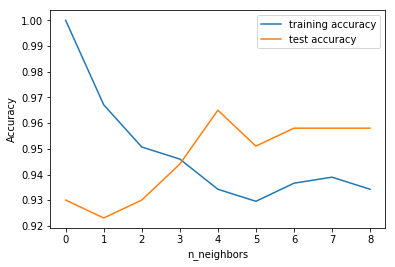

In [67]:
plt.plot(train_accuracy, label="training accuracy")
plt.plot(test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
x = plt.legend()

# k-Neighbors Regression

In [71]:
from sklearn.neighbors import KNeighborsRegressor

In [83]:
boston = load_boston()
X_train,X_test, y_train, y_test = train_test_split(boston.data, boston.target,test_size=0.2, random_state=42 )

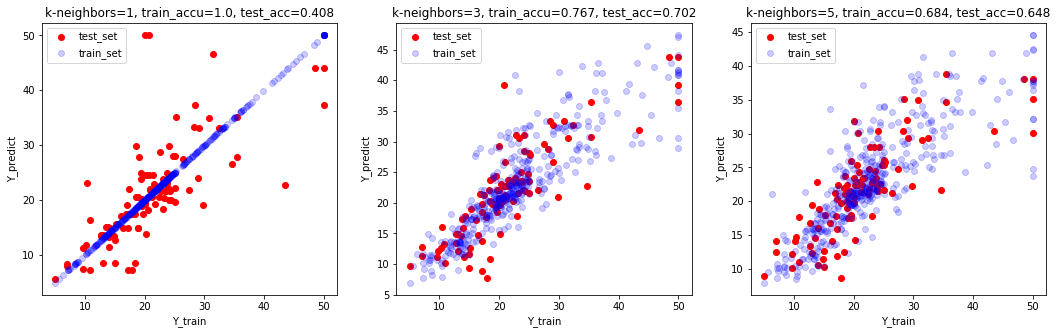

In [90]:
plt.figure(figsize=(18,5))
for k,i in zip([1,3,5],[1,2,3]):
    reg = KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_train, y_train)
    y_pre = reg.predict(X_train)
    y_pre_test = reg.predict(X_test)
    accu = reg.score(X_train, y_train)
    accu1 = reg.score(X_test, y_test)
    plt.subplot(1,3,i)
    plt.plot(y_test, y_pre_test, 'ro', label='test_set')
    plt.plot(y_train, y_pre, 'bo', alpha=0.2, label='train_set')
    plt.xlabel('Y_train')
    plt.ylabel('Y_predict')
    plt.title('k-neighbors={}, train_accu={}, test_acc={}'.format(k, round(accu,3), round(accu1,3)))
    plt.legend()
    